In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

## **Loading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/emails.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [7]:
df.shape

(5172, 3002)

## **Cleaning**

In [8]:
df.drop(columns=['Email No.'], inplace=True)

In [9]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [10]:
df.shape

(5172, 3001)

# Defining functions for :
- split
- train
- test

In [11]:
def spli_and_tarin(n,df):
  X=df.iloc[:, :df.shape[1]-1]
  y=df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

  KNN =  KNeighborsClassifier(n_neighbors=n)
  y_pred=KNN.fit(X_train, y_train).predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  print(f"Accuracy for K-Nearest Neighbors model with {n} neighbors \t: {acc}")
  return acc


# Defining functions for :
- confusion matrix


In [12]:
def plot_cm(n,df):
  X=df.iloc[:, :df.shape[1]-1]
  y=df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

  KNN =  KNeighborsClassifier(n_neighbors=n)
  y_pred=KNN.fit(X_train, y_train).predict(X_test)

  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix for Logistic Regression')
  plt.show()

In [13]:
spli_and_tarin(2,df)

Accuracy for K-Nearest Neighbors model with 2 neighbors 	: 0.8830917874396135


0.8830917874396135

In [14]:
spli_and_tarin(1,df)

Accuracy for K-Nearest Neighbors model with 1 neighbors 	: 0.8705314009661835


0.8705314009661835

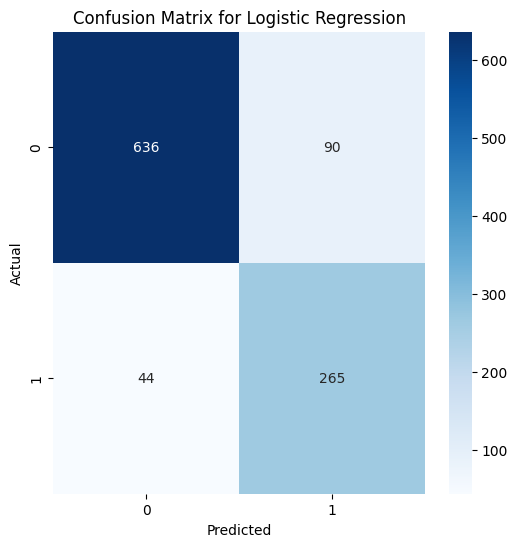

In [15]:
plot_cm(1,df)

# **Handling Imbalanced Classes**

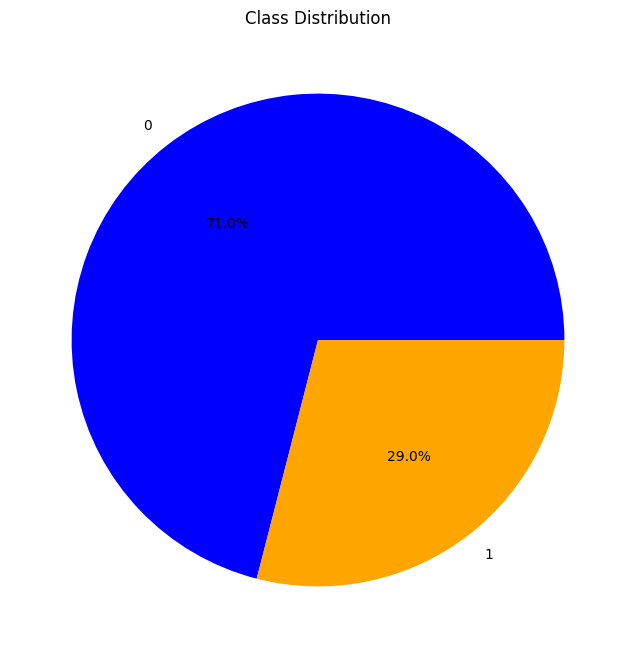

In [16]:
class_counts = df['Prediction'].value_counts()
plt.figure(figsize=(8, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [17]:
data_majority = df[df['Prediction'] == 0]
data_minority = df[df['Prediction'] == 1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)
df_bal = pd.concat([data_majority, data_minority_upsampled])
df_bal = df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

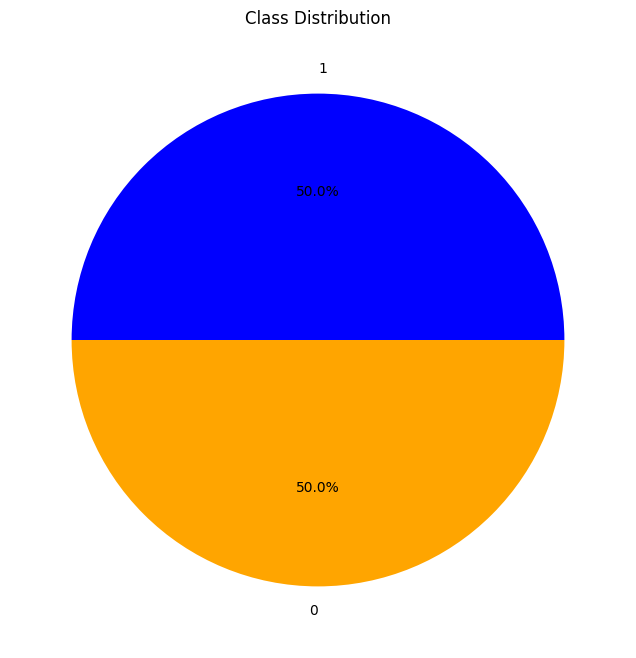

In [18]:
class_counts = df_bal['Prediction'].value_counts()
plt.figure(figsize=(8, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [19]:
spli_and_tarin(2,df_bal)

Accuracy for K-Nearest Neighbors model with 2 neighbors 	: 0.9210347174948945


0.9210347174948945

# **Defining functions for :**
- Elbow curve

In [20]:
k_values = np.arange(1, 21,2)
accuracy_scores = []

In [21]:
for k in k_values:
    acc = spli_and_tarin(k,df_bal)
    accuracy_scores.append(acc)

Accuracy for K-Nearest Neighbors model with 1 neighbors 	: 0.9332879509870661
Accuracy for K-Nearest Neighbors model with 3 neighbors 	: 0.8917631041524847
Accuracy for K-Nearest Neighbors model with 5 neighbors 	: 0.8706603131381893
Accuracy for K-Nearest Neighbors model with 7 neighbors 	: 0.8624914908100749
Accuracy for K-Nearest Neighbors model with 9 neighbors 	: 0.853641933287951
Accuracy for K-Nearest Neighbors model with 11 neighbors 	: 0.8481960517358748
Accuracy for K-Nearest Neighbors model with 13 neighbors 	: 0.8475153165418652
Accuracy for K-Nearest Neighbors model with 15 neighbors 	: 0.8461538461538461
Accuracy for K-Nearest Neighbors model with 17 neighbors 	: 0.8434309053778081
Accuracy for K-Nearest Neighbors model with 19 neighbors 	: 0.8400272294077604


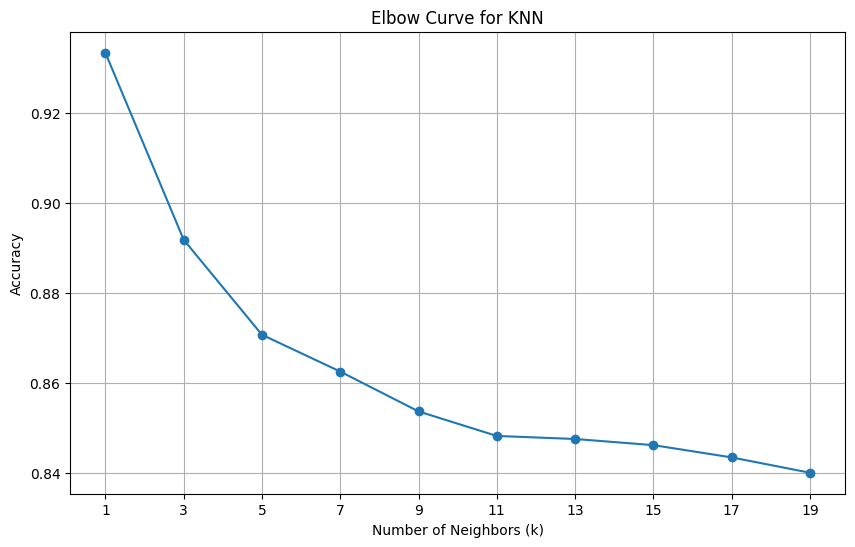

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

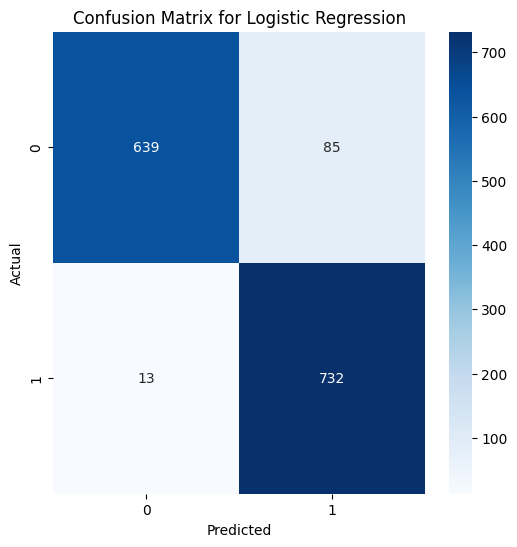

In [23]:
plot_cm(1,df_bal)

##Support Vector Machine (SVM)

In [24]:
def spli_and_tarin_svm(n,k,df):
  X=df.iloc[:, :df.shape[1]-1]
  y=df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

  SVM =  SVC(kernel=k, degree=n, random_state=8)
  y_pred=SVM.fit(X_train, y_train).predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  print(f"Accuracy for SVM model with {n} degree and {k} kernel \t: {acc}")
  return [SVM, acc, y_test, y_pred]


In [25]:
def plot_svm_cm(y_test,y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix for Logistic Regression')
  plt.show()

In [31]:
poly_svm = spli_and_tarin_svm(2,"poly", df_bal)

Accuracy for SVM model with 2 degree and poly kernel 	: 0.672566371681416


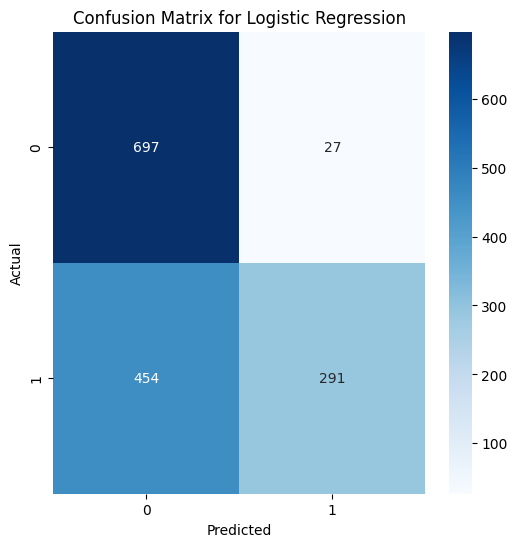

In [32]:
plot_svm_cm(poly_svm[2],poly_svm[3])

In [33]:
rbf_svm = spli_and_tarin_svm(2,"rbf", df_bal)

Accuracy for SVM model with 2 degree and rbf kernel 	: 0.8250510551395507


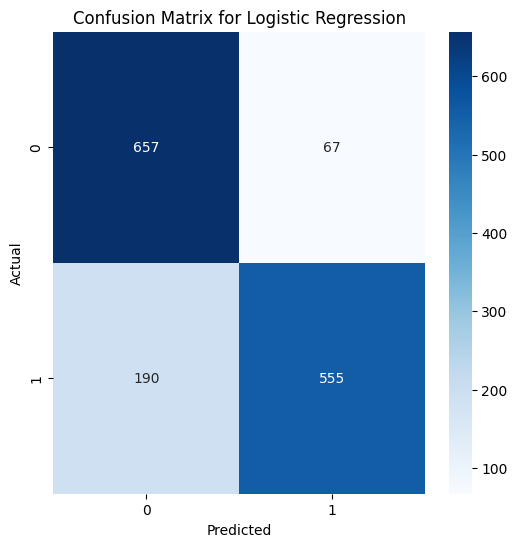

In [34]:
plot_svm_cm(rbf_svm[2],rbf_svm[3])

In [35]:
linear_svm = spli_and_tarin_svm(2,"linear", df_bal)

Accuracy for SVM model with 2 degree and linear kernel 	: 0.9823008849557522


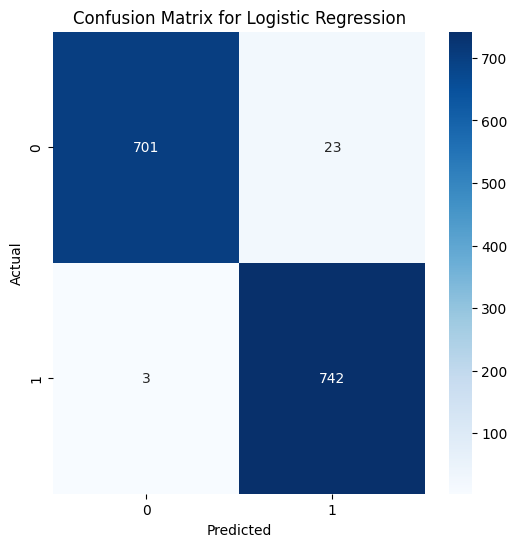

In [36]:
plot_svm_cm(linear_svm[2],linear_svm[3])